# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [4]:
!pip install seaborn

     |████████████████████████████████| 292 kB 1.6 MB/s eta 0:00:01


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#you may want to import some other modules here such as seaborn or matplotlib

In [6]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [70]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [71]:
zipfile.extractall()

In [72]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [73]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [74]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [75]:
movie.isnull().values.any()

False

# Q 2 (.25 point) Check datatype of each of the columns

In [76]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [77]:
# write pandas code here
unique_genre = movie.genres.str.split("|").sum()
unique_genre = set(unique_genre)
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [78]:
# write pandas code here
for g in unique_genre:
    movie[g] = movie.genres.map(lambda x: g in x.split('|'))

movie

,movieId,title,genres,Comedy,Horror,Musical,Crime,IMAX,Animation,Action,...,Western,Thriller,(no genres listed),Film-Noir,Mystery,Romance,Sci-Fi,Fantasy,Drama,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,3,Grumpier Old Men (1995),Comedy|Romance,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
9739,193585,Flint (2017),Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [79]:
# write pandas code here
import re
years = re.compile(r'\([0-9]{4}\)')
yearsLists = [years.findall(movie.title[i]) for i in range(len(movie))]
yearsLists
yearList = []
for years in yearsLists:
    try:
        yearList.append(years[0].replace("(","").replace(")",""))
    except: 
        yearList.append('NA')
movie['Year'] = yearList
movie

,movieId,title,genres,Comedy,Horror,Musical,Crime,IMAX,Animation,Action,...,Thriller,(no genres listed),Film-Noir,Mystery,Romance,Sci-Fi,Fantasy,Drama,Adventure,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,1995
4,5,Father of the Bride Part II (1995),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,True,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,2017
9739,193585,Flint (2017),Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,2018


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

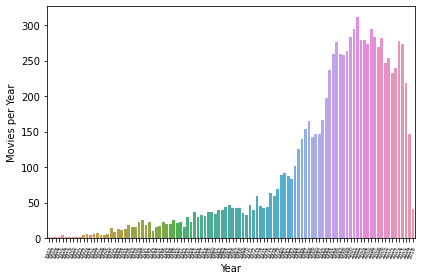

In [94]:
mpy = movie.groupby(['Year']).size().drop("NA").reset_index().rename(columns={0:"Movies per Year"})

sns.barplot(x='Year', y= "Movies per Year" ,data=mpy)
plt.xticks(fontsize=5, rotation=70)
plt.tight_layout()
plt.show()
#The trend in amount of movies per year has risen exponentially before tapering off and decreasing in the early 2000's

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

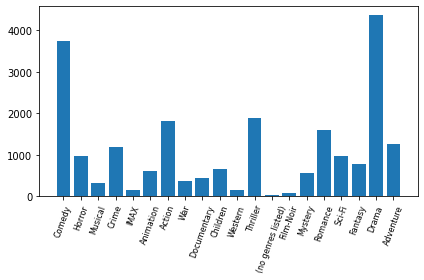

In [117]:
mpgDict = dict()
for i in unique_genre:
    mpgDict[i] = movie[i].sum()

genres = list(mpgDict.keys())
counts = list(mpgDict.values())
plt.bar(range(len(mpgDict)), counts, tick_label=genres)
plt.xticks(fontsize=8, rotation=70)
plt.tight_layout()
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [121]:
for i in range(len(movie)):
    text = movie['title'][i]
    text = text.replace(r'\([0-9]{4}\)', "")
    a = re.sub(r'\([0-9]{4}\)', '', text)
    movie.at[i, 'movie_title'] = a

movie.drop(['title'], axis=1, inplace = True)
movie

,movieId,genres,Comedy,Horror,Musical,Crime,IMAX,Animation,Action,War,...,(no genres listed),Film-Noir,Mystery,Romance,Sci-Fi,Fantasy,Drama,Adventure,Year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,1995,Toy Story
1,2,Adventure|Children|Fantasy,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,1995,Jumanji
2,3,Comedy|Romance,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,1995,Waiting to Exhale
4,5,Comedy,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,True,False,False,False,False,True,True,False,...,False,False,False,False,False,True,False,False,2017,Black Butler: Book of the Atlantic
9738,193583,Animation|Comedy|Fantasy,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,2017,No Game No Life: Zero
9739,193585,Drama,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,2017,Flint
9740,193587,Action|Animation,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,2018,Bungo Stray Dogs: Dead Apple


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [139]:
title_lengths=[]
for i in range(len(movie)): 
    title_lengths.append(len(movie['movie_title'][i].split()))
movie['title_length'] = title_lengths
movie

,movieId,genres,Comedy,Horror,Musical,Crime,IMAX,Animation,Action,War,...,Film-Noir,Mystery,Romance,Sci-Fi,Fantasy,Drama,Adventure,Year,movie_title,title_length
0,1,Adventure|Animation|Children|Comedy|Fantasy,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,1995,Toy Story,2
1,2,Adventure|Children|Fantasy,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,1995,Jumanji,1
2,3,Comedy|Romance,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,1995,Grumpier Old Men,3
3,4,Comedy|Drama|Romance,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,1995,Waiting to Exhale,3
4,5,Comedy,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1995,Father of the Bride Part II,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,True,False,False,False,False,True,True,False,...,False,False,False,False,True,False,False,2017,Black Butler: Book of the Atlantic,6
9738,193583,Animation|Comedy|Fantasy,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,2017,No Game No Life: Zero,5
9739,193585,Drama,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2017,Flint,1
9740,193587,Action|Animation,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,2018,Bungo Stray Dogs: Dead Apple,5


In [163]:
# movie[movie["Year"] == '1935']
data = {}
for i in list(unique_genre):
    tempDF = movie[movie[i]==True].groupby(['Year'])['title_length'].mean().reset_index().rename(columns={'title_length': "Average Title Length"})
    data[i] = tempDF

{'Comedy':      Year  Average Title Length
 0    1908              3.000000
 1    1916              2.000000
 2    1917              2.000000
 3    1919              3.000000
 4    1920              2.000000
 ..    ...                   ...
 96   2014              3.172414
 97   2015              2.634615
 98   2016              3.346667
 99   2017              3.553571
 100  2018              2.941176
 
 [101 rows x 2 columns],
 'Horror':     Year  Average Title Length
 0   1920             10.000000
 1   1922              6.000000
 2   1923              5.000000
 3   1926              1.000000
 4   1927              5.000000
 ..   ...                   ...
 78  2014              3.000000
 79  2015              2.250000
 80  2016              3.250000
 81  2017              1.923077
 82  2018              3.000000
 
 [83 rows x 2 columns],
 'Musical':     Year  Average Title Length
 0   1927              3.000000
 1   1928              2.000000
 2   1929              2.500000
 3   193

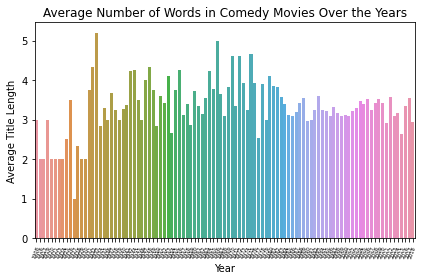

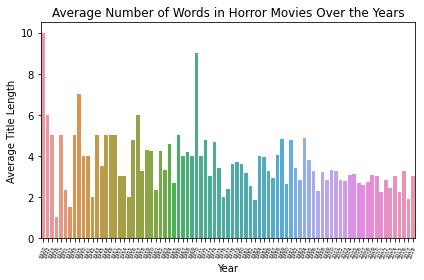

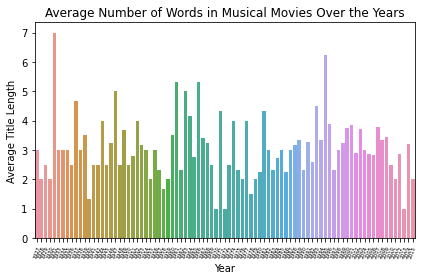

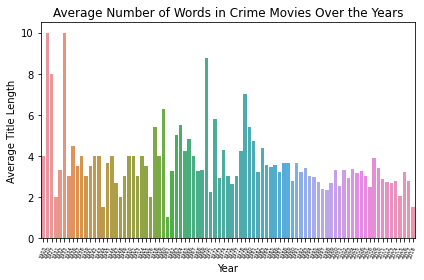

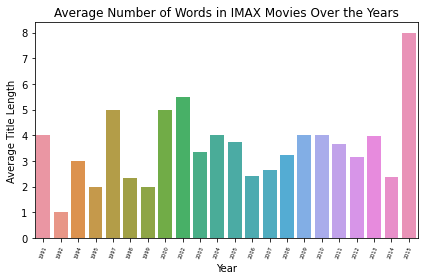

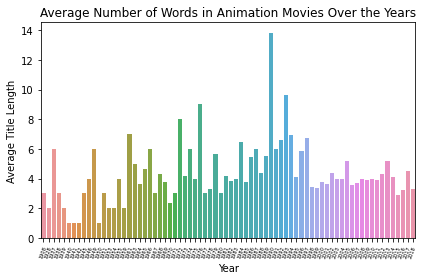

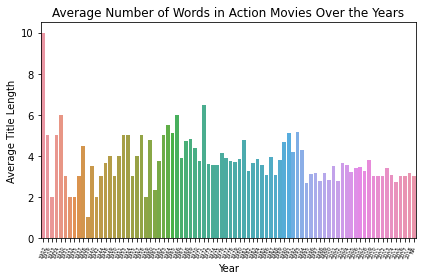

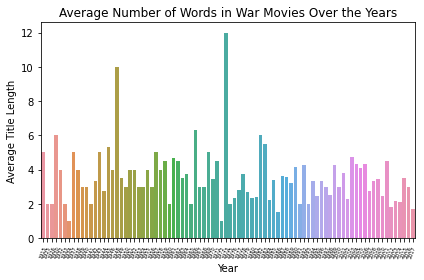

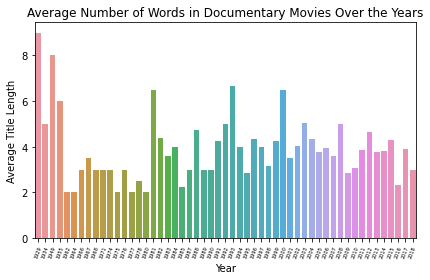

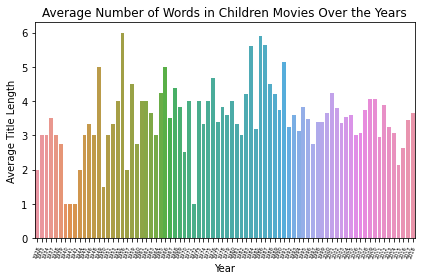

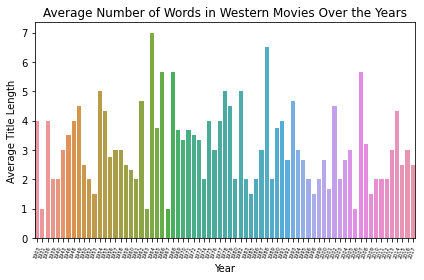

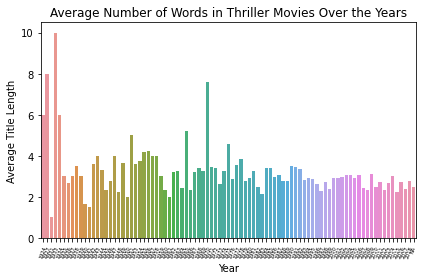

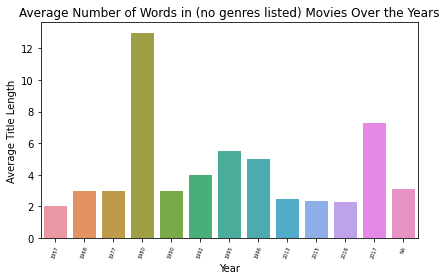

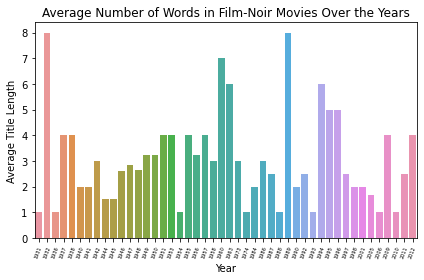

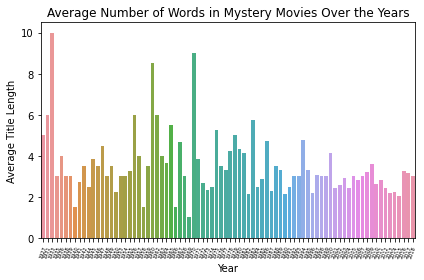

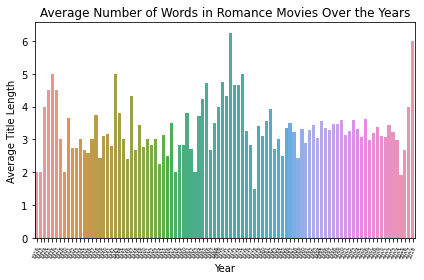

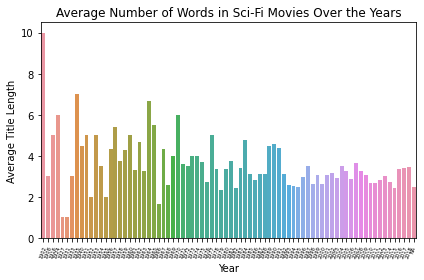

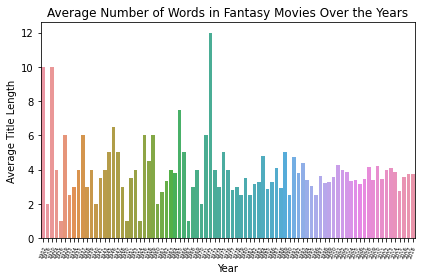

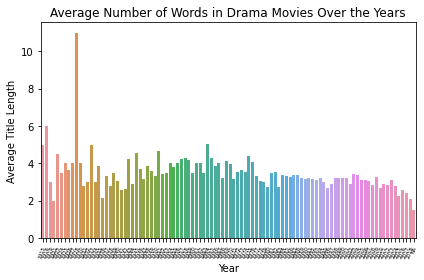

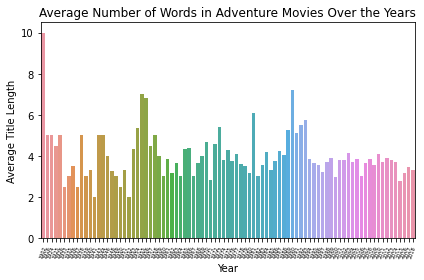

In [165]:
%matplotlib inline
for genre in list(unique_genre):
    sns.barplot(data=data[genre], x='Year', y='Average Title Length').set_title(f'Average Number of Words in {genre} Movies Over the Years')
    plt.xticks(fontsize=5, rotation=70)
    plt.tight_layout()
    plt.show()